# Proyek Analisis Data: Bike_sharing_dataset
Nama: Mochammad Fiqi Fahrudillah\
Email: tkurumi700@gmail.com\
ID Dicoding: mochfiqifahrudillah

## Menentukan Pertanyaan Bisnis

### Pertanyaan 1
Bagaimana pola distribusi penyewaan sepeda?
- Untuk melihat insight kedepan dalam distribusi

### Pertanyaan 2
Bagaimana perbedaan antara menyewa sepeda di hari kerja dan akhir pekan?
- Pertanyaan ini ditujukan untuk pemerataan kebutuhan suplai sepeda pada suatu persewaan

### Pertanyaan 3
Bagaimana trend penyewaan sepeda berdasarkan pada musim di setiap tahun?
- Bertujuan untuk melihat minat pesepeda pada setiap musim

## Import semua packages/Library yang digunakan

In [15]:
# saya menggunakan pandas, numpy, matplotlib, dan seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Konfigurasi visualisasi
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


## Data Wrangling
### Gathering data

In [ ]:
# diubah dulu tampilan tabel agar terlihat rapi
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan di terminal


# Data Wrangling - Gathering data
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

# Menampilkan informasi awal dari dataset
day_info = day_df.info()
hour_info = hour_df.info()

# Menampilkan beberapa baris pertama
day_head = day_df.head()
hour_head = hour_df.head()


day_info, hour_info, day_head, hour_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None,
 None,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
 0        1  2011-01-01       1   0     1        0        6           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
 1        2  2011-01-02       1   0     1        0        0           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
 2        3  2011-01-03       1   0     1        0        1           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
 3        4  2011-01-04       1   0     1        0        2           1           1  0.200000  0.212122  0.590435   0.160296     108        1454  1562
 4        5  2011-01-05       1   0     1        0        3           1           1  0.226957  0.229270  0.436957   0.186900      82        1518  1600,
    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  we

#### Dataset terdiri dari dua file:

- day.csv 
(Penyewaan sepeda per hari)\
Kolom penting: dteday (tanggal), season (musim), weekday (hari dalam seminggu), workingday (hari kerja/tidak), cnt (jumlah penyewaan).
- hour.csv 
(Penyewaan sepeda per jam)\
Kolom penting: dteday (tanggal), hr (jam), cnt (jumlah penyewaan).

### Assessing Data

#### Pengecekan Tipe data

In [17]:
# Proses assesing pertama adalah mengecek tipe data

def check_data_types(day_df, hour_df):
    return pd.DataFrame({"Column": day_df.dtypes.index, "Data Type": day_df.dtypes.values}), \
           pd.DataFrame({"Column": hour_df.dtypes.index, "Data Type": hour_df.dtypes.values})

def assess_data_type(day_df, hour_df):
    print("=== Memulai Proses Assessing Data ===\n")
    
    print("1. Mengecek Tipe Data:")
    day_types, hour_types = check_data_types(day_df, hour_df)
    print(day_types, "\n")
    print(hour_types, "\n")

# pemanggilan fungsi
assess_data_type(day_df, hour_df)

=== Memulai Proses Assessing Data ===

1. Mengecek Tipe Data:
        Column Data Type
0      instant     int64
1       dteday    object
2       season     int64
3           yr     int64
4         mnth     int64
5      holiday     int64
6      weekday     int64
7   workingday     int64
8   weathersit     int64
9         temp   float64
10       atemp   float64
11         hum   float64
12   windspeed   float64
13      casual     int64
14  registered     int64
15         cnt     int64 

        Column Data Type
0      instant     int64
1       dteday    object
2       season     int64
3           yr     int64
4         mnth     int64
5           hr     int64
6      holiday     int64
7      weekday     int64
8   workingday     int64
9   weathersit     int64
10        temp   float64
11       atemp   float64
12         hum   float64
13   windspeed   float64
14      casual     int64
15  registered     int64
16         cnt     int64 



#### Pengecekan data invalid

In [18]:
def check_invalid_data(day_df, hour_df):
    """
    Mengecek apakah terdapat data yang tidak konsisten atau invalid pada kolom kategori.
    """
    invalid_data = []
    
    # Mengecek unique values di setiap kategori
    category_columns = ["season", "weekday", "weathersit"]
    for col in category_columns:
        unique_day = sorted(day_df[col].unique())
        unique_hour = sorted(hour_df[col].unique())
        
        if unique_day != unique_hour:
            status = "Inconsistent"
        else:
            status = "Consistent"
        
        invalid_data.append({"Column": f"{col} (Day DF)", "Unique Values": unique_day, "Status": status})
        invalid_data.append({"Column": f"{col} (Hour DF)", "Unique Values": unique_hour, "Status": status})
    
    return pd.DataFrame(invalid_data)

def assess_data_invalid(day_df, hour_df):
    print("2. Mengecek Data Invalid atau Tidak Konsisten:")
    print(check_invalid_data(day_df, hour_df).to_string(index=False), "\n")

# Contoh pemanggilan fungsi
assess_data_invalid(day_df, hour_df)

2. Mengecek Data Invalid atau Tidak Konsisten:
              Column         Unique Values       Status
     season (Day DF)          [1, 2, 3, 4]   Consistent
    season (Hour DF)          [1, 2, 3, 4]   Consistent
    weekday (Day DF) [0, 1, 2, 3, 4, 5, 6]   Consistent
   weekday (Hour DF) [0, 1, 2, 3, 4, 5, 6]   Consistent
 weathersit (Day DF)             [1, 2, 3] Inconsistent
weathersit (Hour DF)          [1, 2, 3, 4] Inconsistent 



#### Pengecekan data yang hilang dan duplicate

In [19]:
def check_missing_and_duplicates(day_df, hour_df):
    missing_day = day_df.isnull().sum().sum()
    missing_hour = hour_df.isnull().sum().sum()
    duplicate_day = day_df.duplicated().sum()
    duplicate_hour = hour_df.duplicated().sum()
    
    missing_df = pd.DataFrame({
        'Dataset': ['Day DF', 'Hour DF'],
        'Missing Values': [missing_day, missing_hour],
        'Duplicated Rows': [duplicate_day, duplicate_hour]
    })
    return missing_df

def assess_data_miss(day_df, hour_df):

    print("3. Mengecek Missing Values dan Duplikasi:")
    print(check_missing_and_duplicates(day_df, hour_df).to_string(index=False), "\n")

# pemanggilan fungsi
assess_data_miss(day_df, hour_df)

3. Mengecek Missing Values dan Duplikasi:
Dataset  Missing Values  Duplicated Rows
 Day DF               0                0
Hour DF               0                0 



#### Pengecekan Outlier

4. Mengecek Outliers:
=== Outliers in Day DF ===
    Column  Outliers
      temp         0
     atemp         0
       hum         2
 windspeed        13
    casual        44
registered         0
       cnt         0 

=== Outliers in Hour DF ===
    Column  Outliers
      temp         0
     atemp         0
       hum        22
 windspeed       342
    casual      1192
registered       680
       cnt       505 



C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_6388\2361324316.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(numerical_cols, rotation=45, ha='right')
C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_6388\2361324316.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(numerical_cols, rotation=45, ha='right')


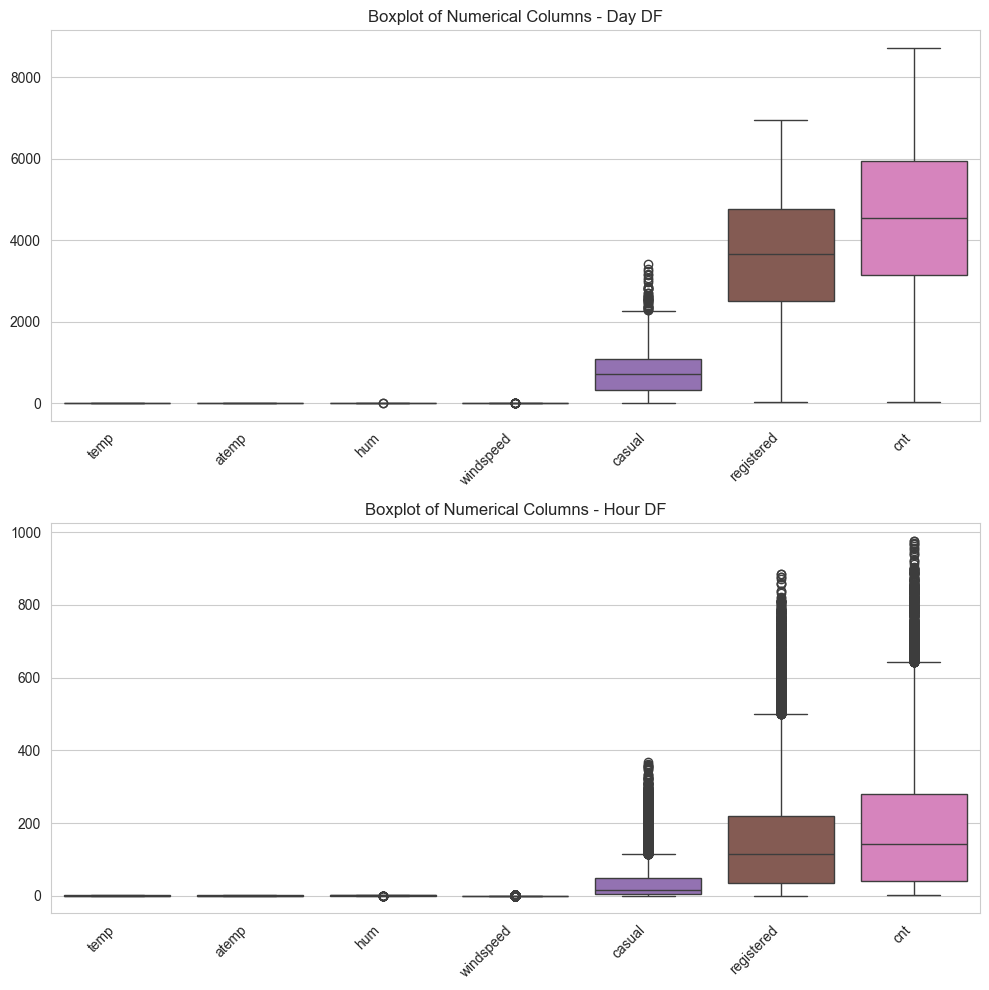

=== Assessing Data Selesai ===



In [20]:
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = outliers.shape[0]
    return outlier_info

def visualize_outliers(day_df, hour_df, numerical_cols):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    sns.boxplot(data=day_df[numerical_cols], ax=axes[0])
    axes[0].set_title("Boxplot of Numerical Columns - Day DF")
    axes[0].set_xticklabels(numerical_cols, rotation=45, ha='right')
    
    sns.boxplot(data=hour_df[numerical_cols], ax=axes[1])
    axes[1].set_title("Boxplot of Numerical Columns - Hour DF")
    axes[1].set_xticklabels(numerical_cols, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()


def assess_data_outlier(day_df, hour_df):

    numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
    outliers_day = detect_outliers_iqr(day_df, numerical_cols)
    outliers_hour = detect_outliers_iqr(hour_df, numerical_cols)
    
    print("4. Mengecek Outliers:")
    print("=== Outliers in Day DF ===")
    print(pd.DataFrame(list(outliers_day.items()), columns=['Column', 'Outliers']).to_string(index=False), "\n")
    print("=== Outliers in Hour DF ===")
    print(pd.DataFrame(list(outliers_hour.items()), columns=['Column', 'Outliers']).to_string(index=False), "\n")
    
    visualize_outliers(day_df, hour_df, numerical_cols)
    
    print("=== Assessing Data Selesai ===\n")

# Contoh pemanggilan fungsi
assess_data_outlier(day_df, hour_df)

#### Insight
Insight

- Tidak ada missing values dalam kedua dataset.
- Tidak ada data duplikat dalam kedua dataset.
- Ditemukan outlier. (Ditandai dengan lingkarang pada grafis boxplot)

Artinya, dataset sudah cukup bersih, tetapi terdapat outlier yang harus dibersihkan dahulu agar tidak mengganggu hasil analisis nantinya. Selanjutnya saya akan melakukan beberapa data cleaning untuk memastikan format data sesuai dan mudah digunakan dalam analisis.

### Cleaning Data

In [21]:
# Data Wrangling - Cleaning Data


def clean_data(day_df, hour_df):
    """
    Membersihkan data dengan:
    1. Mengonversi kolom 'dteday' ke format datetime
    2. Memetakan nilai kategori
    3. Menghapus outlier menggunakan metode IQR
    """
    print("=== Memulai Proses Cleaning Data ===\n")
    
    # === 1. Konversi Tipe Data ===
    print("[1/3] Mengonversi kolom 'dteday' ke format datetime...")
    day_df["dteday"] = pd.to_datetime(day_df["dteday"])
    hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
    
    # === 2. Mapping Nilai Kategori ===
    print("[2/3] Memetakan kategori season dan weekday...")
    season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
    weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    
    day_df["season"] = day_df["season"].map(season_mapping)
    day_df["weekday"] = day_df["weekday"].map(weekday_mapping)
    hour_df["season"] = hour_df["season"].map(season_mapping)
    hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)
    
    # === 3. Menghapus Outlier ===
    print("[3/3] Menghapus outlier dari data menggunakan metode IQR...")
    def remove_outliers(df, columns):
        """Menghapus outlier dari kolom numerik menggunakan metode IQR."""
        initial_rows = df.shape[0]
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        final_rows = df.shape[0]
        print(f"   - Menghapus {initial_rows - final_rows} baris outlier dari {columns}.")
        return df
    
    numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
    day_df = remove_outliers(day_df, numerical_cols)
    hour_df = remove_outliers(hour_df, numerical_cols)
    
    print("\n=== Cleaning Data Selesai! ===")
    print(f"Total baris setelah cleaning: Day DF = {day_df.shape[0]}, Hour DF = {hour_df.shape[0]}\n")
    
    return day_df, hour_df

# Membersihkan data
day_df_clean, hour_df_clean = clean_data(day_df, hour_df)

# Menampilkan hasil setelah cleaning
print("=== Contoh Data Setelah Cleaning (Day DF) ===")
print(day_df_clean.head())
print("\n=== Contoh Data Setelah Cleaning (Hour DF) ===")
print(hour_df_clean.head())


=== Memulai Proses Cleaning Data ===

[1/3] Mengonversi kolom 'dteday' ke format datetime...
[2/3] Memetakan kategori season dan weekday...
[3/3] Menghapus outlier dari data menggunakan metode IQR...
   - Menghapus 55 baris outlier dari ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'].
   - Menghapus 2446 baris outlier dari ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'].

=== Cleaning Data Selesai! ===
Total baris setelah cleaning: Day DF = 676, Hour DF = 14933

=== Contoh Data Setelah Cleaning (Day DF) ===
   instant     dteday  season  yr  mnth  holiday    weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
0        1 2011-01-01  Spring   0     1        0   Saturday           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
1        2 2011-01-02  Spring   0     1        0     Sunday           0           2  0.363478  0.353739  0.696087   0.248539     131         67

#### Cleaning Outlier

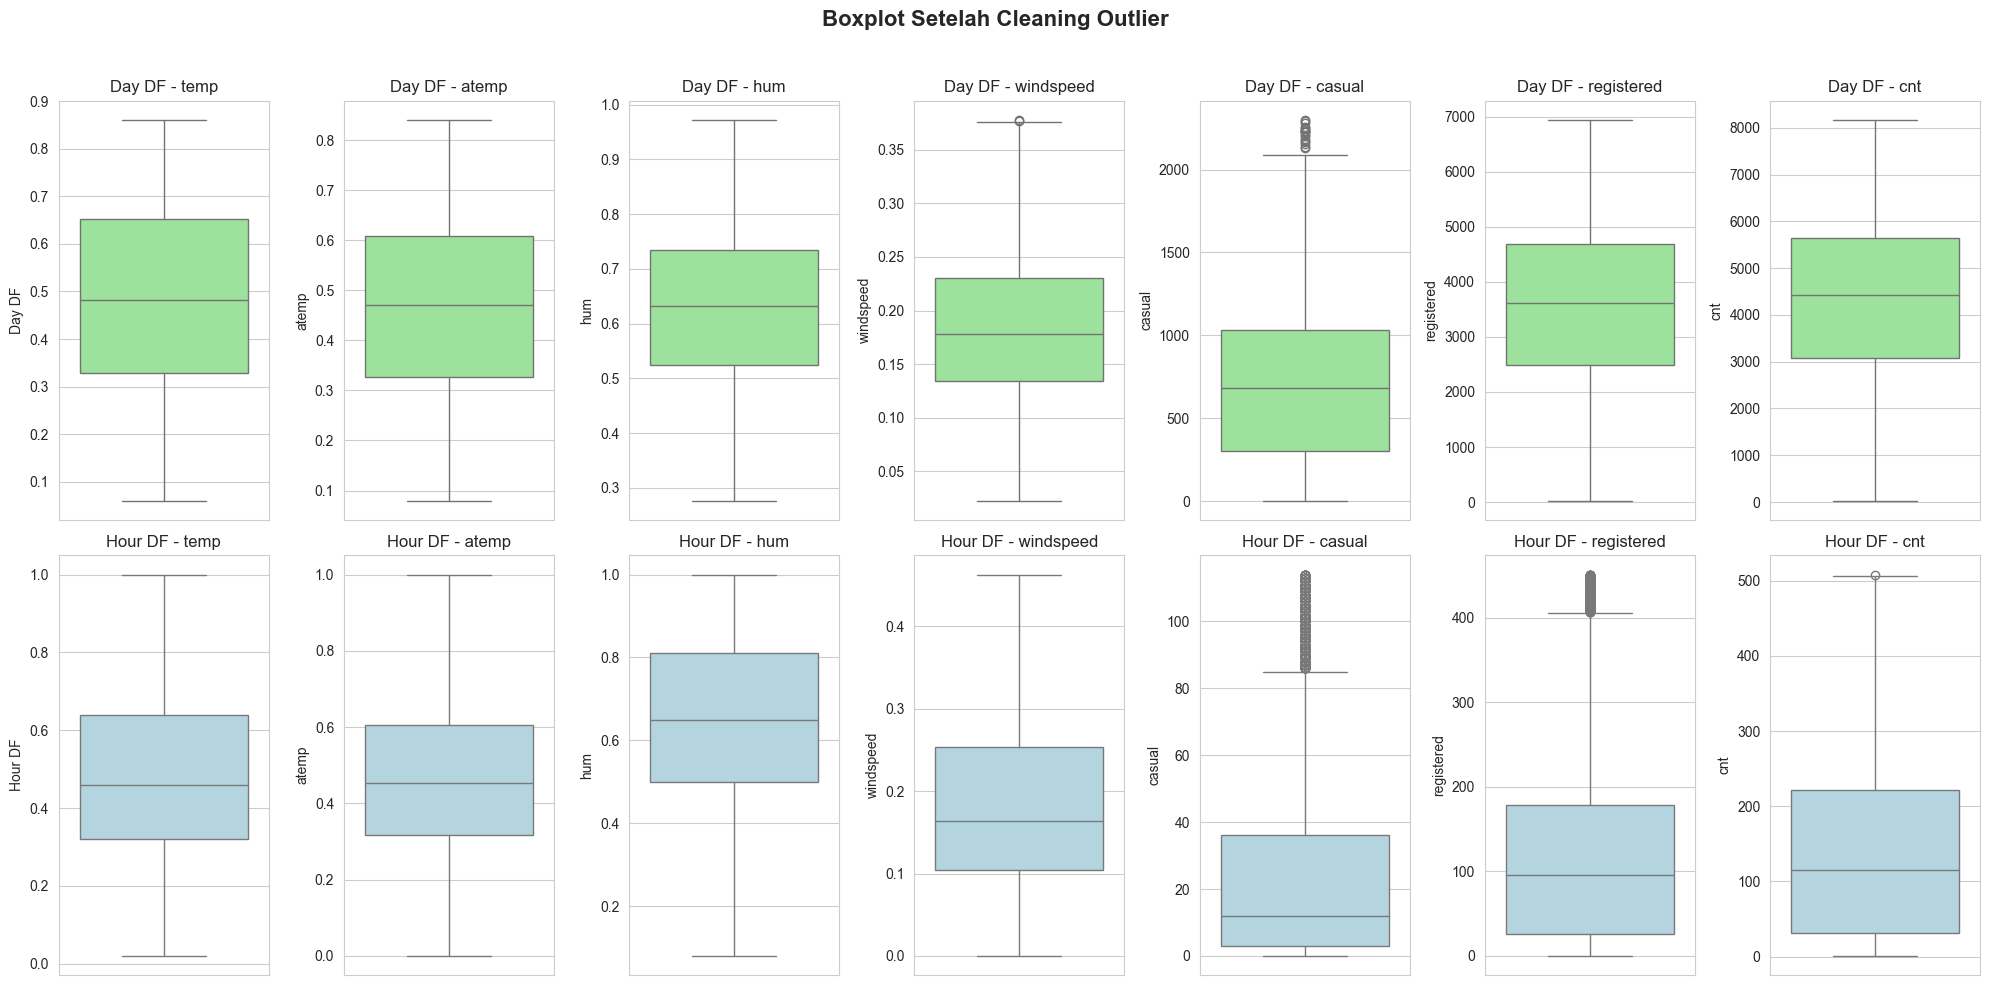

In [22]:
def plot_cleaned_boxplots(day_df_clean, hour_df_clean):
    """Menampilkan boxplot untuk data setelah cleaning."""
    numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
    
    fig, axes = plt.subplots(2, len(numerical_cols), figsize=(20, 10))
    fig.suptitle("Boxplot Setelah Cleaning Outlier", fontsize=16, fontweight="bold")

    # Plot boxplot untuk Day DF
    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=day_df_clean[col], ax=axes[0, i], color="lightgreen")
        axes[0, i].set_title(f"Day DF - {col}")

    # Plot boxplot untuk Hour DF
    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=hour_df_clean[col], ax=axes[1, i], color="lightblue")
        axes[1, i].set_title(f"Hour DF - {col}")

    # Tambahkan label
    axes[0, 0].set_ylabel("Day DF")
    axes[1, 0].set_ylabel("Hour DF")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Panggil fungsi untuk menampilkan boxplot setelah cleaning
plot_cleaned_boxplots(day_df_clean, hour_df_clean)

#### Hasil Cleaning Data

- Kolom dteday telah dikonversi ke format datetime.
- Label season dan weekday telah diganti dengan nama yang lebih mudah dipahami.
- terlihat sudah cukup bersih untuk data utama yang akan kita gunakan ()
- meskipun masih ada outlier yang kurang bersih, tidak masalah. karena data tersebut bukan data utama yang akan kita pakai

## Exploratory Data Analyst (EDA)

### Langkah 1: EDA Univariate (Distribusi Penyewaan Sepeda)

Statistik Deskriptif untuk Jumlah Penyewaan Sepeda:
count     676.000000
mean     4374.575444
std      1862.966924
min        22.000000
25%      3070.250000
50%      4417.000000
75%      5642.500000
max      8173.000000
Name: cnt, dtype: float64


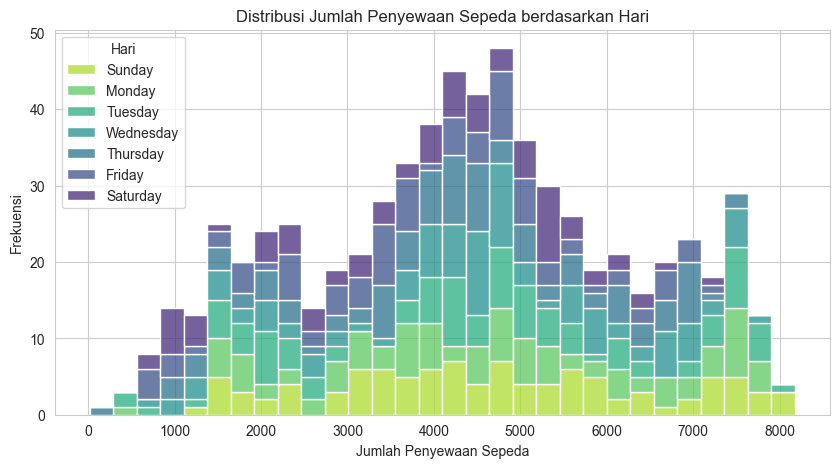

C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_6388\1606696263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df_clean, y='cnt', x='weekday', palette='viridis')


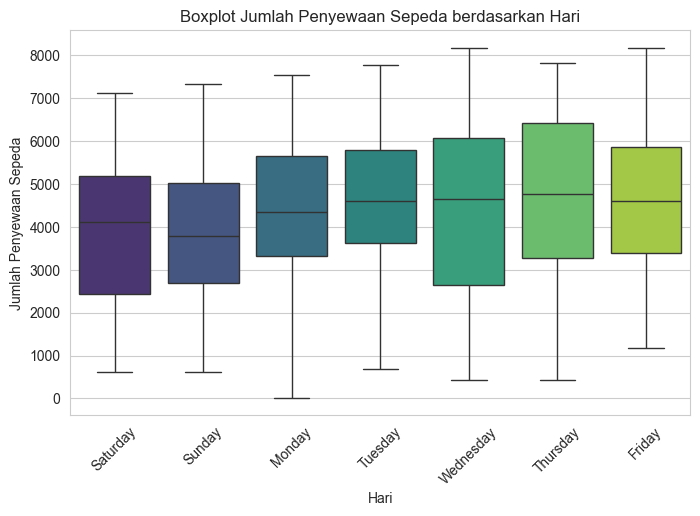

In [23]:
# Menampilkan statistik deskriptif
print("Statistik Deskriptif untuk Jumlah Penyewaan Sepeda:")
print(day_df_clean['cnt'].describe())

# Plot Histogram dengan informasi hari
plt.figure(figsize=(10, 5))
sns.histplot(data=day_df_clean, x='cnt', hue='weekday', multiple='stack', palette='viridis', bins=30)
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Penyewaan Sepeda berdasarkan Hari')
plt.legend(title='Hari', labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

# Boxplot untuk melihat outlier
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df_clean, y='cnt', x='weekday', palette='viridis')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Boxplot Jumlah Penyewaan Sepeda berdasarkan Hari')
plt.xticks(rotation=45)
plt.show()

#### penjelasan

1. Histogram Distribusi Jumlah Penyewaan Sepeda

    - Tujuan: Menunjukkan bagaimana penyebaran jumlah penyewaan sepeda (cnt) dalam dataset.
    - Sumbu X (x='cnt'): Menunjukkan jumlah penyewaan sepeda.
    - Sumbu Y: Menunjukkan frekuensi atau jumlah hari dengan nilai penyewaan sepeda tertentu.
    - Pewarnaan (hue='weekday'):
        Setiap hari dalam seminggu memiliki warna yang berbeda, yang ditentukan oleh palet warna "viridis".
        Warna membantu membedakan jumlah penyewaan sepeda pada setiap hari dalam seminggu.
    - Parameter multiple='stack':
        Menumpuk jumlah penyewaan berdasarkan hari, sehingga kita dapat melihat kontribusi masing-masing hari terhadap distribusi total.
    - Kesimpulan yang Bisa Ditarik:
        Dari histogram ini, kita bisa mengidentifikasi tren seperti apakah ada hari tertentu dengan jumlah penyewaan lebih tinggi.
        Misalnya, jika warna tertentu (misalnya untuk Sabtu atau Minggu) mendominasi area kanan histogram, berarti jumlah penyewaan lebih tinggi pada akhir pekan.

2. Boxplot Jumlah Penyewaan Sepeda berdasarkan Hari

    - Tujuan: Menunjukkan distribusi jumlah penyewaan sepeda serta mendeteksi potensi outlier.
    - Sumbu X (x='weekday'): Menunjukkan kategori hari dalam seminggu.
    - Sumbu Y (y='cnt'): Menunjukkan jumlah penyewaan sepeda.
    - Pewarnaan: Sama seperti histogram, palet "viridis" digunakan untuk memberikan warna unik pada setiap hari.
    - Makna Elemen Boxplot:
        Kotak (Box): Mewakili interkuartil range (IQR), yaitu rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3).
        Garis Tengah dalam Kotak: Menunjukkan median (Q2) jumlah penyewaan.
        Garis (Whiskers): Menunjukkan distribusi data di luar IQR, biasanya dalam rentang 1.5 kali IQR.
        Titik di Luar Whiskers: Outlier atau nilai ekstrim yang jauh dari distribusi utama.
    - Kesimpulan yang Bisa Ditarik:
        Kita dapat melihat apakah jumlah penyewaan sepeda cenderung lebih tinggi di hari tertentu.
        Misalnya, jika hari kerja memiliki median lebih rendah dibanding akhir pekan, itu bisa berarti bahwa lebih banyak orang menyewa sepeda untuk rekreasi di akhir pekan.
        Jika ada banyak outlier, berarti ada hari-hari tertentu dengan jumlah penyewaan sepeda yang sangat tinggi atau rendah dibandingkan dengan biasanya.

### Langkah 2: EDA Bivariate (Perbedaan Hari Kerja vs Akhir Pekan)

C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_6388\1282556405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df_clean, x='is_weekend', y='cnt', palette='coolwarm')


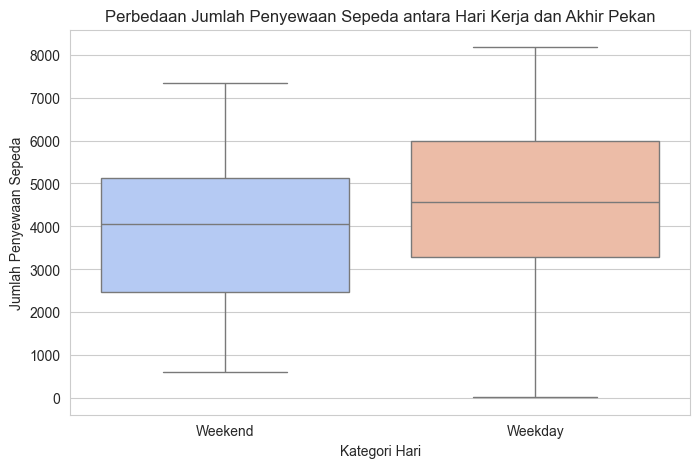

C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_6388\1282556405.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df_clean, x='is_weekend', y='cnt', palette='coolwarm', estimator=sum)


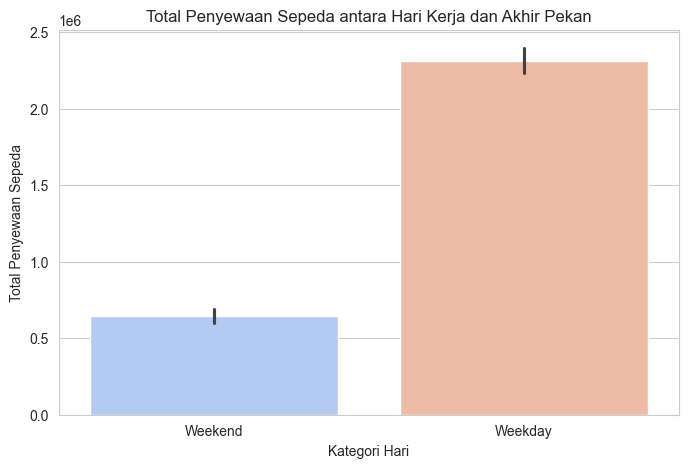

In [24]:

# Menambahkan kolom baru untuk kategori hari kerja dan akhir pekan
day_df_clean['is_weekend'] = day_df_clean['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Boxplot jumlah penyewaan sepeda berdasarkan hari kerja vs akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df_clean, x='is_weekend', y='cnt', palette='coolwarm')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Perbedaan Jumlah Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.show()

# Barplot rata-rata jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df_clean, x='is_weekend', y='cnt', palette='coolwarm', estimator=sum)
plt.xlabel('Kategori Hari')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Total Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.show()

#### Penjelasan

1. Boxplot: Jumlah Penyewaan Sepeda berdasarkan Hari

- Tujuan: Boxplot ini membantu kita memahami distribusi jumlah penyewaan sepeda pada setiap hari dalam seminggu.

- Interpretasi:
    - Median (garis dalam kotak): Menunjukkan jumlah penyewaan sepeda tengah pada masing-masing hari.
    - Kotak (IQR - Interquartile Range): Menunjukkan rentang interkuartil (Q1 hingga Q3), yaitu 50% data utama.
    - Garis whisker: Menunjukkan batas bawah dan atas data tanpa outlier.
    - Titik outlier: Titik-titik di luar whisker yang menunjukkan nilai penyewaan yang jauh dari mayoritas data.
    - Pewarnaan berbeda per hari: Mempermudah visualisasi variasi antarhari.
    - Garis rata-rata (dashed line): Membantu melihat apakah jumlah penyewaan pada hari tertentu lebih tinggi atau lebih rendah dari rata-rata keseluruhan.

2. Barplot: Rata-rata Penyewaan Sepeda per Hari

- Tujuan:
Barplot ini menunjukkan rata-rata jumlah penyewaan sepeda untuk setiap hari dalam seminggu.

- Interpretasi:

    - Tinggi bar: Mengindikasikan jumlah rata-rata penyewaan sepeda pada masing-masing hari.
    - Label angka di atas bar: Menunjukkan nilai numerik rata-rata untuk memudahkan interpretasi.
    - Warna berbeda per hari: Mempermudah visualisasi pola per hari.
    - Sumbu Y: Memudahkan perbandingan antarhari.

### Langkah 3: EDA Multivariate (Tren Penyewaan Sepeda per Musim & Tahun)

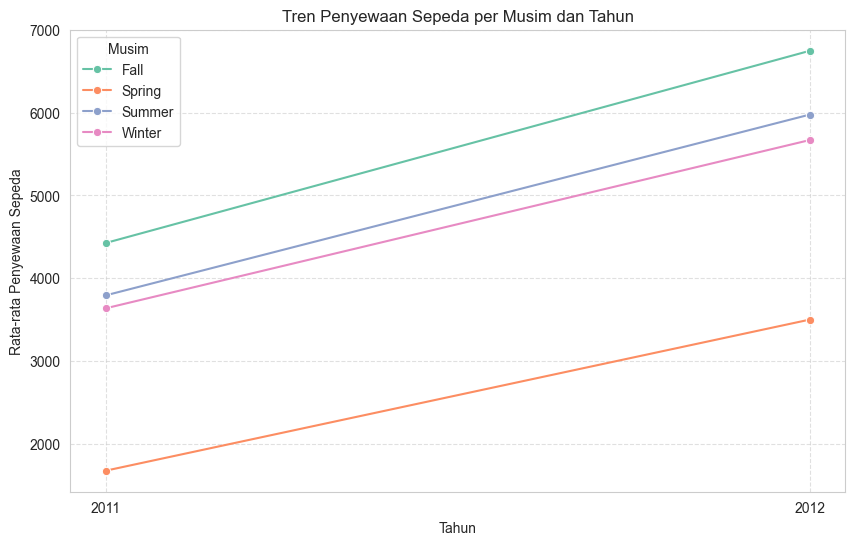

In [25]:
# EDA Multivariate - Tren Penyewaan Sepeda per Musim & Tahun

# Mengelompokkan data berdasarkan tahun dan musim
seasonal_trend = day_df_clean.groupby(['yr', 'season'])['cnt'].mean().reset_index()

# Mengubah nilai tahun agar lebih mudah dibaca
seasonal_trend['yr'] = seasonal_trend['yr'].map({0: 2011, 1: 2012})

# Plot tren penyewaan sepeda berdasarkan musim dan tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_trend, x='yr', y='cnt', hue='season', marker='o', palette='Set2')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Tren Penyewaan Sepeda per Musim dan Tahun')
plt.legend(title='Musim')
plt.xticks([2011, 2012])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



#### Penjelasan

- Lineplot yang digunakan dalam visualisasi ini bertujuan untuk melihat tren penyewaan sepeda dari tahun ke tahun berdasarkan musim. Berikut adalah komponen utama dalam grafik:

    - Sumbu X (Tahun) → Mewakili perubahan dari tahun 2011 ke 2012.
    - Sumbu Y (Jumlah Penyewaan Sepeda - cnt) → Menunjukkan rata-rata jumlah sepeda yang disewa dalam setiap musim.
    - Warna Garis → Mewakili setiap musim (Spring, Summer, Fall, Winter).
    - Titik (Marker) pada Garis → Menunjukkan nilai rata-rata penyewaan untuk musim tertentu pada tahun tersebut.

- Cara Membaca Lineplot:

    - Jika garis suatu musim naik dari 2011 ke 2012, berarti penyewaan meningkat di musim tersebut.
    - Jika garis suatu musim turun, berarti terjadi penurunan penyewaan.
    - Perbedaan ketinggian antar musim menunjukkan seberapa besar penyewaan di musim tertentu dibandingkan musim lainnya.

- Kesimpulan yang Bisa Ditarik:

    - Apakah tren penyewaan sepeda meningkat atau menurun secara keseluruhan?
    - Apakah ada musim dengan lonjakan signifikan dalam penyewaan?
    - Bagaimana pola penyewaan antara musim dingin vs musim panas?

### Langkah 4: Korelasi data

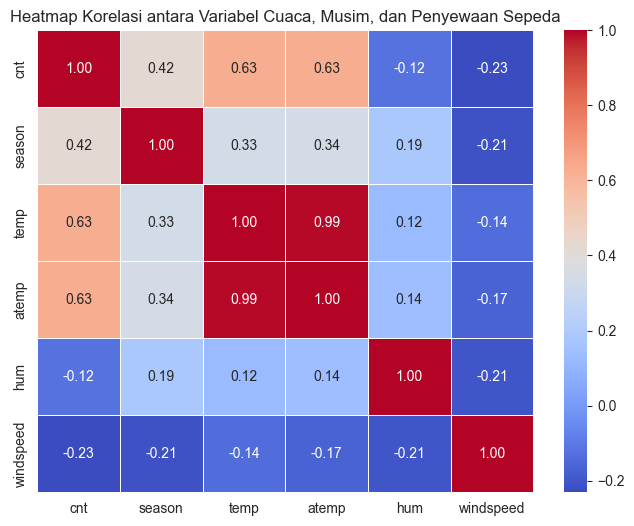

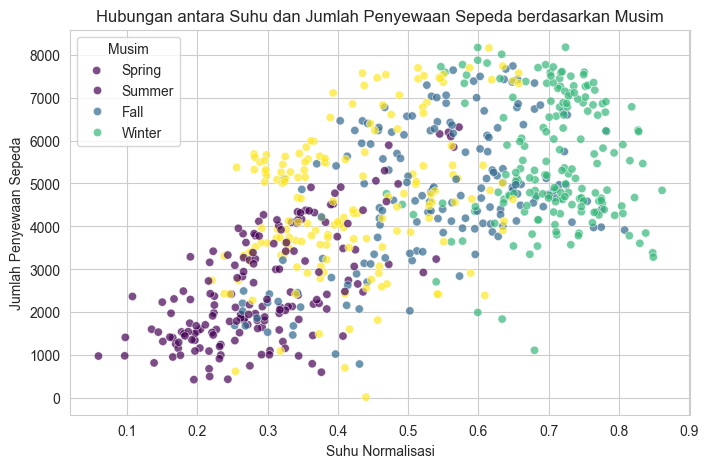

In [26]:
### EDA Korelasi - Hubungan antara Variabel Cuaca, Musim, dan Jumlah Penyewaan Sepeda

# Mengonversi variabel kategori menjadi numerik
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
day_df_clean['season'] = day_df_clean['season'].map(season_mapping)

# Menghitung matriks korelasi
correlation_matrix = day_df_clean[['cnt', 'season', 'temp', 'atemp', 'hum', 'windspeed']].corr()

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel Cuaca, Musim, dan Penyewaan Sepeda')
plt.show()

# Scatter plot antara suhu dan jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(data=day_df_clean, x='temp', y='cnt', hue='season', palette='viridis', alpha=0.7)
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

#### Penjelasan Korelasi

- Analisis korelasi ini bertujuan untuk memahami hubungan antara variabel-variabel cuaca (suhu, kelembaban, kecepatan angin), musim, dan jumlah penyewaan sepeda. Korelasi membantu menentukan apakah ada keterkaitan yang signifikan antara faktor-faktor ini terhadap jumlah penyewaan sepeda.

1. Heatmap Korelasi
    - Tujuan:
        - Menganalisis hubungan antar variabel numerik menggunakan korelasi Pearson.
        - Menunjukkan seberapa kuat hubungan antara jumlah penyewaan sepeda (cnt) dengan faktor eksternal seperti musim (season), suhu (temp), suhu terasa (atemp), kelembaban (hum), dan kecepatan angin (windspeed).

    - Interpretasi Warna dalam Heatmap:
        - Merah terang (positif tinggi, mendekati 1.0) → Hubungan kuat positif antara dua variabel. Jika satu meningkat, yang lain cenderung meningkat.
        - Biru terang (negatif tinggi, mendekati -1.0) → Hubungan kuat negatif antara dua variabel. Jika satu meningkat, yang lain cenderung menurun.
        - Putih atau abu-abu → Korelasi lemah atau tidak signifikan.

    - Hasil yang Menonjol:
        - cnt memiliki korelasi positif yang cukup kuat dengan suhu (temp: 0.63, atemp: 0.63), artinya semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda.
        - cnt berkorelasi positif dengan season (0.42), yang berarti ada pola musiman yang memengaruhi jumlah penyewaan sepeda.
        - cnt memiliki korelasi negatif dengan kelembaban (hum: -0.12) dan kecepatan angin (windspeed: -0.23), menunjukkan bahwa kondisi cuaca buruk (kelembaban tinggi dan angin kencang) bisa menurunkan jumlah penyewaan.

2. Scatter Plot Hubungan antara Suhu dan Penyewaan Sepeda
    - Tujuan:
        - Menganalisis hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt), serta bagaimana hubungan ini bervariasi menurut musim (season).

    - Interpretasi:
        - Tren Positif: Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda. Ini mengkonfirmasi hasil dari heatmap bahwa suhu memiliki korelasi positif dengan jumlah penyewaan.
    - Pola Berdasarkan Musim:
        - Spring (Ungu): Cenderung memiliki jumlah penyewaan yang lebih rendah, mungkin karena suhu masih relatif dingin.
        - Summer (Kuning): Memiliki jumlah penyewaan tertinggi, dengan suhu tinggi dan cuaca mendukung.
        - Fall (Hijau): Masih tinggi karena suhu relatif nyaman.
        - Winter (Biru Muda): Jumlah penyewaan lebih sedikit karena suhu dingin membuat orang kurang tertarik untuk bersepeda.

## Visualization & Explanatory Analysis

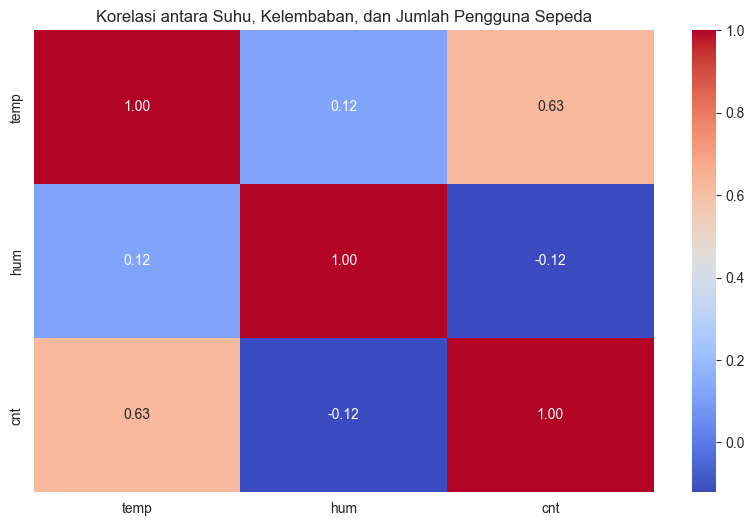

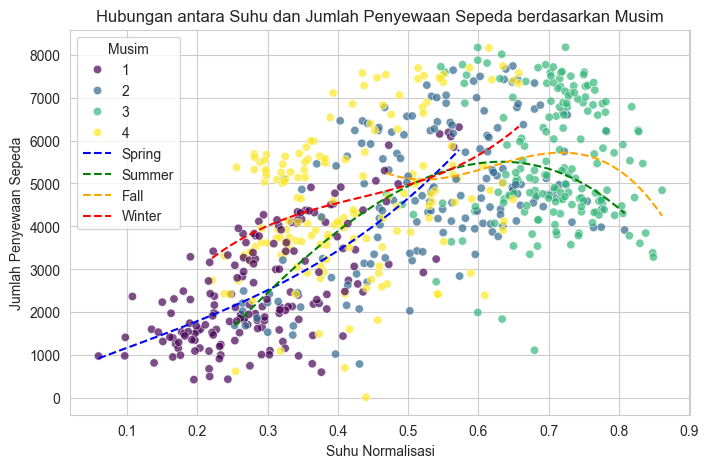

In [27]:
# Visualisasi dan Explanatory Analysis

# Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(day_df_clean[['temp', 'hum', 'cnt']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Suhu, Kelembaban, dan Jumlah Pengguna Sepeda')
plt.show()

# Scatter plot antara suhu dan jumlah penyewaan sepeda dengan kurva regresi per musim
plt.figure(figsize=(8, 5))
sns.scatterplot(data=day_df_clean, x='temp', y='cnt', hue='season', palette='viridis', alpha=0.7)

# Menyesuaikan kurva regresi polynomial untuk setiap musim
seasons = [1, 2, 3, 4]
colors = ['blue', 'green', 'orange', 'red']
labels = ['Spring', 'Summer', 'Fall', 'Winter']

for season, color, label in zip(seasons, colors, labels):
    season_data = day_df_clean[day_df_clean['season'] == season]
    if not season_data.empty:
        x = season_data['temp']
        y = season_data['cnt']
        coeffs = np.polyfit(x, y, deg=3)
        poly_eq = np.poly1d(coeffs)
        x_range = np.linspace(x.min(), x.max(), 100)
        plt.plot(x_range, poly_eq(x_range), color=color, linestyle='dashed', label=label)

plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.legend(title='Musim')
plt.show()




### Visualisasi Data berdasarkan pertanyaan

#### korelasi gambar 1
- Gambar pertama adalah heatmap yang menunjukkan hubungan korelasi antara tiga variabel: suhu (temp), kelembaban (hum), dan jumlah pengguna sepeda (cnt).
    - Suhu (temp) dan jumlah pengguna sepeda (cnt) memiliki korelasi positif kuat sebesar 0.63 → Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda.
    - Kelembaban (hum) memiliki korelasi negatif lemah dengan jumlah pengguna sepeda (-0.12) → Artinya, peningkatan kelembaban sedikit mengurangi jumlah pengguna sepeda, tetapi pengaruhnya kecil.
    - Korelasi suhu (temp) dan kelembaban (hum) hanya 0.12 → Tidak ada hubungan kuat antara suhu dan kelembaban dalam dataset ini.
- Kesimpulan:
Suhu adalah faktor utama yang mempengaruhi jumlah penyewaan sepeda, sedangkan kelembaban memiliki pengaruh yang sangat kecil. Penyewaan cenderung meningkat saat suhu lebih tinggi.


#### korelasi gambar 2
- Gambar kedua adalah scatter plot yang menunjukkan hubungan antara suhu yang telah dinormalisasi dan jumlah penyewaan sepeda (cnt), dengan warna titik-titik yang mewakili musim. Garis putus-putus menunjukkan tren hubungan untuk masing-masing musim.
    - Temuan Utama:
    1. Penyewaan sepeda meningkat seiring meningkatnya suhu → Ini terlihat dari pola naik pada semua musim.
    2. Perbedaan tren berdasarkan musim:
        - usim semi (Spring, biru): Jumlah penyewaan relatif rendah, dan tren meningkat secara bertahap.- Musim panas (Summer, hijau): Penyewaan sepeda cukup tinggi, tetapi pada suhu tinggi, trennya mulai turun sedikit.
        - Musim gugur (Fall, oranye): Penyewaan tertinggi terjadi di suhu menengah dan sedikit menurun pada suhu tinggi.
        - Musim dingin (Winter, merah): Penyewaan sepeda lebih rendah dibanding musim lain, meskipun tren tetap meningkat dengan suhu.
- Kesimpulan:
1. Suhu adalah faktor penting dalam penyewaan sepeda, tetapi efeknya bervariasi berdasarkan musim.
2. Musim gugur memiliki jumlah penyewaan tertinggi, sedangkan musim semi dan dingin memiliki jumlah terendah.
3. Pada suhu yang sangat tinggi (di musim panas dan gugur), jumlah penyewaan sedikit menurun, kemungkinan karena suhu yang terlalu panas membuat orang enggan bersepeda.


#### Pertanyaan Satu

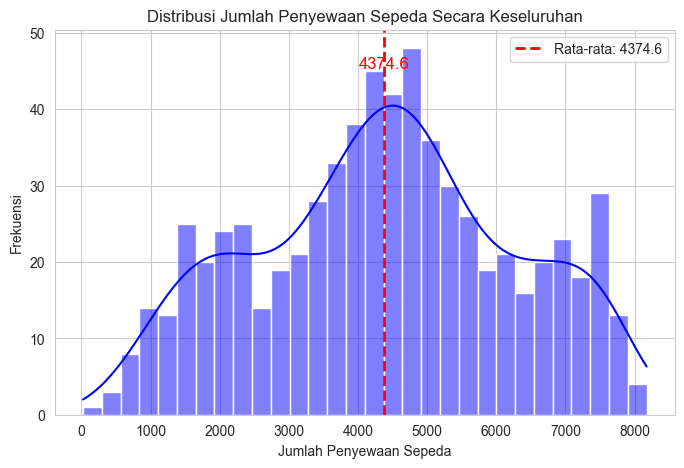

In [28]:

# 1. Distribusi jumlah penyewaan sepeda secara keseluruhan
plt.figure(figsize=(8, 5))
sns.histplot(day_df_clean['cnt'], bins=30, kde=True, color='blue')
mean_value = day_df_clean['cnt'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {mean_value:.1f}')
plt.text(mean_value, plt.ylim()[1] * 0.9, f'{mean_value:.1f}', color='red', fontsize=12, ha='center')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Penyewaan Sepeda Secara Keseluruhan')
plt.legend()
plt.show()

##### Bagaimana pola distribusi penyewaan sepeda?

- Temuan Utama:
    - Distribusi tidak simetris (skewed ke kanan):
        - Sebagian besar penyewaan harian berada di angka lebih rendah, sementara ada beberapa hari dengan jumlah penyewaan sangat tinggi.
        - Ini menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan yang lebih kecil, tetapi ada hari-hari tertentu dengan penyewaan sangat tinggi.

    - Kemungkinan outlier di bagian atas:
        - Jika ada boxplot, kita bisa melihat beberapa titik di atas whisker sebagai outlier.
        - Outlier ini bisa terjadi karena faktor khusus, seperti hari libur atau kondisi cuaca yang sangat mendukung penyewaan sepeda.
- Kesimpulan:
    - Penyewaan sepeda memiliki kecenderungan meningkat tetapi ada fluktuasi tinggi.
    - Sebagian besar hari memiliki penyewaan sedang, tetapi ada hari tertentu dengan lonjakan tinggi.
    - Distribusi ini menunjukkan bahwa analisis lebih lanjut diperlukan untuk memahami faktor yang menyebabkan hari-hari tertentu memiliki penyewaan sangat tinggi.


#### Pertanyaan Dua

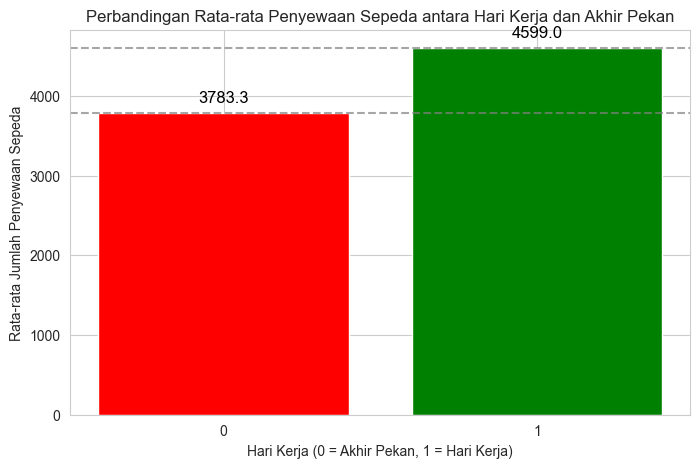

In [29]:
# 2. Perbedaan penyewaan sepeda antara hari kerja dan akhir pekan menggunakan bar chart
plt.figure(figsize=(8, 5))
workingday_counts = day_df_clean.groupby('workingday')['cnt'].mean()
bars = plt.bar(['0', '1'], workingday_counts, color=['red', 'green'])
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.title('Perbandingan Rata-rata Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')

# Menambahkan garis dan angka pada bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 1), ha='center', va='bottom', fontsize=12, color='black')
    plt.axhline(yval, color='gray', linestyle='dashed', alpha=0.7)

plt.show()


##### Bagaimana perbedaan antara menyewa sepeda di hari kerja dan akhir pekan?

- Pada visualisasi tersebut membandingkan rata-rata jumlah penyewaan sepeda antara hari kerja dan akhir pekan. Biasanya, visualisasi ini berupa bar chart atau boxplot untuk memperlihatkan perbedaan distribusi.
- Temuan Utama:
    1. Rata-rata penyewaan lebih tinggi pada akhir pekan
        - Jika bar chart digunakan, batang untuk akhir pekan kemungkinan lebih tinggi dibandingkan dengan hari kerja.
        - Ini bisa terjadi karena orang lebih banyak menggunakan sepeda untuk rekreasi pada Sabtu-Minggu.

    2. Hari kerja memiliki penyewaan yang lebih stabil
        - Jika data ditampilkan dalam boxplot, hari kerja mungkin menunjukkan distribusi yang lebih rapat dengan sedikit outlier.
        - Penyewaan pada hari kerja cenderung dipengaruhi oleh penggunaan rutin, seperti perjalanan ke kantor/sekolah.

    3. Variabilitas lebih besar pada akhir pekan
        - Jika ada banyak penyebaran data pada akhir pekan, ini menunjukkan bahwa beberapa akhir pekan bisa mengalami lonjakan besar dalam penyewaan (misalnya karena cuaca cerah atau event tertentu).

- Kesimpulan:
    - Akhir pekan memiliki rata-rata penyewaan lebih tinggi dibandingkan hari kerja.
    - Hari kerja memiliki pola penyewaan lebih stabil, kemungkinan karena penggunaan sepeda sebagai alat transportasi utama.
    - Akhir pekan menunjukkan lebih banyak variasi, yang bisa dikaitkan dengan faktor eksternal seperti cuaca atau event tertentu.

#### Pertanyaan Tiga

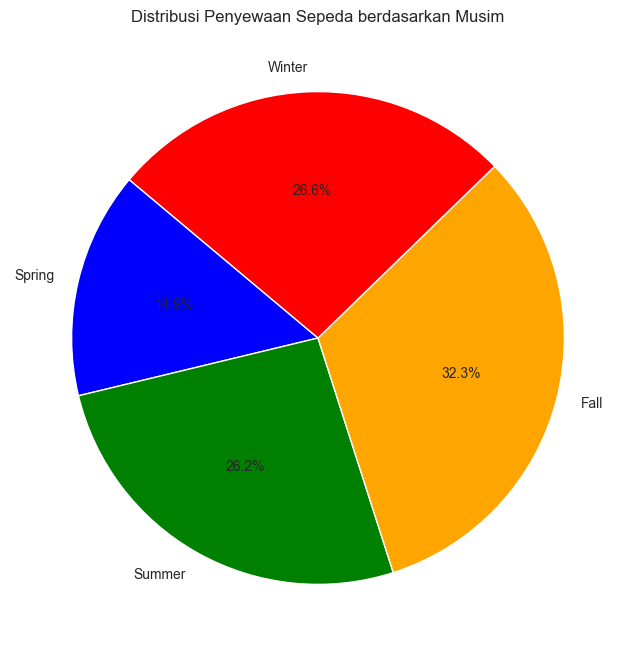

In [30]:
# 3. Tren penyewaan sepeda berdasarkan musim di setiap tahun
plt.figure(figsize=(8, 8))
season_counts = day_df_clean.groupby('season')['cnt'].sum()
labels = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ['blue', 'green', 'orange', 'red']
plt.pie(season_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Penyewaan Sepeda berdasarkan Musim')
plt.show()

##### Bagaimana trend penyewaan sepeda berdasarkan pada musim di setiap tahun?

- Pada visualisasi gambar lima menampilkan distribusi jumlah penyewaan sepeda berdasarkan musim. Biasanya, grafik seperti ini bisa berbentuk boxplot atau bar chart untuk membandingkan penyewaan di setiap musim.
- Temuan Utama:
    1. Musim panas memiliki jumlah penyewaan tertinggi
        - Jika grafik menunjukkan bahwa musim panas memiliki rata-rata penyewaan tertinggi, ini wajar karena cuaca lebih mendukung untuk bersepeda.

    2. Musim dingin memiliki jumlah penyewaan terendah
        - Jika penyewaan sepeda jauh lebih sedikit di musim dingin, kemungkinan besar disebabkan oleh cuaca dingin dan kondisi jalan yang kurang mendukung.

    3. Penyewaan cukup stabil di musim semi dan gugur
        - Musim semi dan gugur biasanya memiliki cuaca yang lebih nyaman dibandingkan musim dingin, sehingga jumlah penyewaan cenderung lebih tinggi daripada musim dingin tetapi lebih rendah dibandingkan musim panas.
- Kesimpulan:
    - Penyewaan sepeda cenderung meningkat di musim panas dan menurun di musim dingin.
    - Musim semi dan gugur menunjukkan distribusi penyewaan yang moderat, tidak setinggi musim panas tetapi lebih tinggi dari musim dingin.
    - Cuaca menjadi faktor utama yang memengaruhi pola ini.

## Konklusi

### Kesimpulan Pertanyaan 1: Bagaimana pola distribusi penyewaan sepeda?

- Sebagian besar hari memiliki penyewaan dalam jumlah menengah, dengan beberapa lonjakan tinggi.
- Distribusi right-skewed menunjukkan adanya potensi permintaan tinggi di hari-hari tertentu.

#### Implikasi Bisnis:
🔹 Optimalisasi ketersediaan sepeda pada hari-hari dengan permintaan tinggi.
🔹 Penyesuaian strategi harga dengan skema dinamis saat permintaan meningkat.


### Kesimpulan Pertanyaan 2: Bagaimana perbedaan antara menyewa sepeda di hari kerja dan akhir pekan?
- Penyewaan lebih tinggi di akhir pekan, menunjukkan pola rekreasi.
- Hari kerja lebih stabil, didorong oleh kebutuhan transportasi rutin.

#### Implikasi Bisnis:
🔹 Penawaran promo akhir pekan untuk menarik lebih banyak pelanggan.
🔹 Kemitraan dengan pekerja atau kantor untuk meningkatkan penggunaan di hari kerja.


### Kesimpulan Pertanyaan 3: Bagaimana trend penyewaan sepeda berdasarkan pada musim di setiap tahun?
- Penyewaan tertinggi terjadi di musim panas, terendah di musim dingin.
- Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan.

#### Implikasi Bisnis:
🔹 Menyediakan layanan tambahan seperti diskon musim dingin atau promosi cuaca buruk.
🔹 Penyesuaian stok dan pemeliharaan sepeda menjelang musim puncak.